In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
import seaborn as sns
pd.options.display.max_rows = 10

# Investigating correlations between variables

In [2]:
us_data = pd.read_csv("./output/US_cleaned_data_2018")
us_data

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description
0,0,2kyS6SvSYSE,17.11.14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,17.11.13,['SHANtell martin'],748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1,1ZAPwfrtAFY,17.11.14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,17.11.13,"['last week tonight trump presidency', '""last ...",2418783,97185,6146,12703,False,"One year after the presidential election, John..."
2,2,5qpjK5DgCt4,17.11.14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,17.11.12,"['racist superman', '""rudy""', '""mancuso""', '""k...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,3,puqaWrEC7tY,17.11.14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,17.11.13,"['rhett and link', '""gmm""', '""good mythical mo...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...
4,4,d380meD0W0M,17.11.14,I Dare You: GOING BALD!?,nigahiga,Entertainment,17.11.12,"['ryan', '""higa""', '""higatv""', '""nigahiga""', '...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...
5,5,gHZ1Qz0KiKM,17.11.14,2 Weeks with iPhone X,iJustine,Science & Technology,17.11.13,"['ijustine', '""week with iPhone X""', '""iphone ...",119180,9763,511,1434,False,Using the iPhone for the past two weeks -- her...
6,6,39idVpFF7NQ,17.11.14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,Entertainment,17.11.12,"['SNL', '""Saturday Night Live""', '""SNL Season ...",2103417,15993,2445,1970,False,Embattled Alabama Senate candidate Roy Moore (...
7,7,nc99ccSXST0,17.11.14,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,Science & Technology,17.11.12,"['5 Ice Cream Gadgets', '""Ice Cream""', '""Cream...",817732,23663,778,3432,False,Ice Cream Pint Combination Lock - http://amzn....
8,8,jr9QtXwC9vc,17.11.14,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,Film & Animation,17.11.13,"['Trailer', '""Hugh Jackman""', '""Michelle Willi...",826059,3543,119,340,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,9,TUmyygCMMGA,17.11.14,Why the rise of the robots won’t mean the end ...,Vox,News & Politics,17.11.13,"['vox.com', '""vox""', '""explain""', '""shift chan...",256426,12654,1363,2368,False,"For now, at least, we have better things to wo..."


In [3]:
us_data.drop(columns='Unnamed: 0', inplace=True)

# this error column doesn't give us much information, so drop
us_data.drop(columns='video_error_or_removed', inplace=True)
us_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description
0,2kyS6SvSYSE,17.11.14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,17.11.13,['SHANtell martin'],748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.11.14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,17.11.13,"['last week tonight trump presidency', '""last ...",2418783,97185,6146,12703,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.11.14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,17.11.12,"['racist superman', '""rudy""', '""mancuso""', '""k...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.11.14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,17.11.13,"['rhett and link', '""gmm""', '""good mythical mo...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.11.14,I Dare You: GOING BALD!?,nigahiga,Entertainment,17.11.12,"['ryan', '""higa""', '""higatv""', '""nigahiga""', '...",2095731,132235,1989,17518,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.11.14,2 Weeks with iPhone X,iJustine,Science & Technology,17.11.13,"['ijustine', '""week with iPhone X""', '""iphone ...",119180,9763,511,1434,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.11.14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,Entertainment,17.11.12,"['SNL', '""Saturday Night Live""', '""SNL Season ...",2103417,15993,2445,1970,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.11.14,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,Science & Technology,17.11.12,"['5 Ice Cream Gadgets', '""Ice Cream""', '""Cream...",817732,23663,778,3432,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.11.14,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,Film & Animation,17.11.13,"['Trailer', '""Hugh Jackman""', '""Michelle Willi...",826059,3543,119,340,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.11.14,Why the rise of the robots won’t mean the end ...,Vox,News & Politics,17.11.13,"['vox.com', '""vox""', '""explain""', '""shift chan...",256426,12654,1363,2368,"For now, at least, we have better things to wo..."


---

In [8]:
# function to calculate the time, in days, between publication and trending of a video
def time_to_trending(publish_time, trending_time):
    total_days = 0
    days_in_a_year = 365
    days_in_a_month = 30
    
    year_publish = publish_time.split(".")[0]
    month_publish = publish_time.split(".")[1]
    day_publish = publish_time.split(".")[2]
    
    year_trending = trending_time.split(".")[0]
    month_trending = trending_time.split(".")[1]
    day_trending = trending_time.split(".")[2]
    
    date_publish = date(int(year_publish), int(month_publish), int(day_publish))
    date_trending = date(int(year_trending), int(month_trending), int(day_trending))
    delta = date_trending - date_publish
    return delta.days

In [12]:
us_data['time_difference'] = us_data.apply(lambda x: time_to_trending(x['publish_time'], x['trending_date']), axis=1)

In [23]:
us_data.get("time_difference").unique()

array([   1,    2, 2361,    8,    4,  207,    3,    5,   28,    6,  908,
       2424, 1983,  228,   32,   10,    7,    0, 2862,    9,  208, 2362,
         29,  909, 2863, 2363,  209,   26,   22,   30,   11, 2364,  210,
         27,   23,  516,   12,   13, 3176, 1704,   14, 3177,   24,  403,
       1705,  404,  538,   25, 1706,  772,   37,  405,  539,  330,   16,
        773,   38,  406,  379,  540,  331,  795,  774,   39, 1719, 3448,
        380,  407,  541,  332,  796,  775,   40, 3449, 1720,  381,  408,
       3398,  542,  333,  797, 2463,  776,   41, 3450, 1721, 2114,  382,
       3399,  409,  543,  334,  798, 2464,  777,   42, 3451, 1722, 2115,
       3400,  383, 2076, 2465,  778,   15,  247, 2202, 2077, 2466,  779,
        248, 2203, 2078, 2467, 1377,  249,  256,  250, 1820, 2163,  251,
        824, 1380, 1821, 2164, 1550,  825, 1822, 1551,  826, 1823, 1552,
        827,   21, 1420, 1421, 3113,  581,  582,  583, 2933,  584, 2411,
       1285, 2934,  135,   59, 2412, 1286, 2935,  1

---

## Overall, most trending videos take fewer than 500 days to become trending

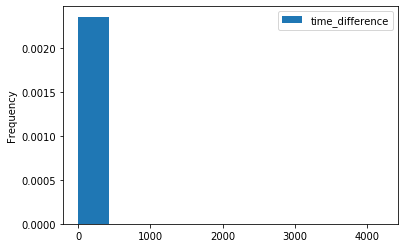

In [26]:
us_data.plot(kind='hist', y='time_difference', density=True)

## Videos that take over 200 days to become trending have a distribution skewed to the right

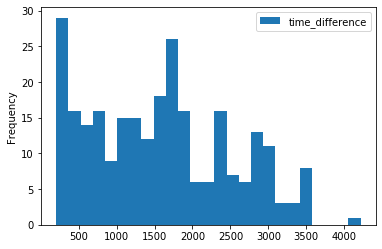

In [47]:
us_data.where(us_data.get("time_difference") > 200).plot(kind='hist', y='time_difference', bins=25)

## Video that take fewer than 200 days to trend are almost exclusively between 0 to 50 days

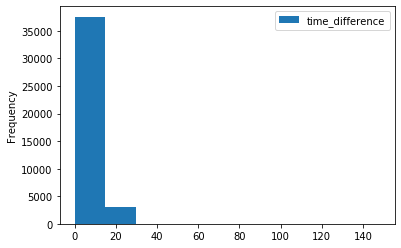

In [48]:
us_data.where(us_data.get("time_difference") <= 200).plot(kind='hist', y='time_difference')

## Most trending videos take on average 5 days to trend after publication

In [36]:
us_data.where(us_data.get("time_difference") <= 50).get("time_difference").median()

5.0

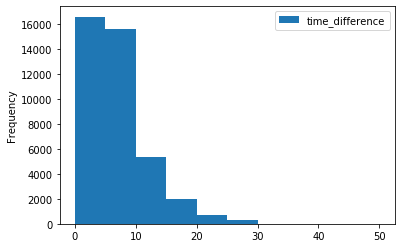

In [42]:
us_data.where(us_data.get("time_difference") <= 50).plot(kind='hist', y='time_difference')

---

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D1476BE80>,
      dtype=object)

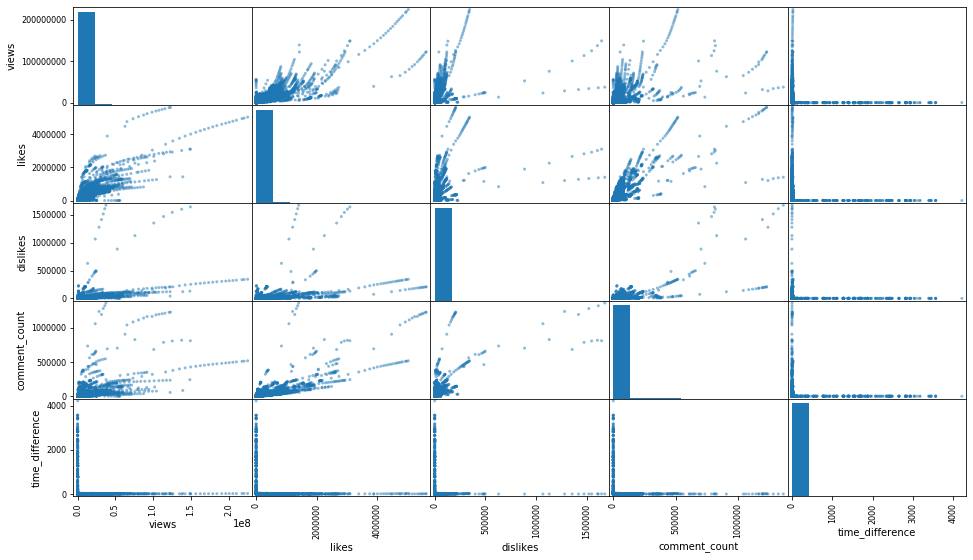

In [38]:
pd.plotting.scatter_matrix(us_data, figsize=(16,9))

In [39]:
us_data.corr()

,views,likes,dislikes,comment_count,time_difference
views,1.000000,0.849177,0.472213,0.617621,-0.014427
likes,0.849177,1.000000,0.447186,0.803057,-0.017650
dislikes,0.472213,0.447186,1.000000,0.700184,-0.007056
comment_count,0.617621,0.803057,0.700184,1.000000,-0.013254
time_difference,-0.014427,-0.017650,-0.007056,-0.013254,1.000000


---

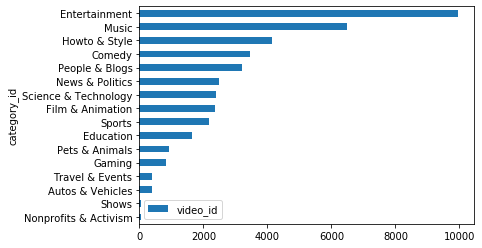

In [53]:
us_data.groupby("category_id").count().sort_values("video_id").plot(kind='barh', y="video_id")

In [66]:
us_data_by_category

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,description,time_difference
category_id,,,,,,,,,,,,
Autos & Vehicles,384,384,384,384,384,384,384,384,384,384,379,384
Comedy,3457,3457,3457,3457,3457,3457,3457,3457,3457,3457,3435,3457
Education,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656,1642,1656
Entertainment,9964,9964,9964,9964,9964,9964,9964,9964,9964,9964,9819,9964
Film & Animation,2345,2345,2345,2345,2345,2345,2345,2345,2345,2345,2340,2345
...,...,...,...,...,...,...,...,...,...,...,...,...
Pets & Animals,920,920,920,920,920,920,920,920,920,920,916,920
Science & Technology,2401,2401,2401,2401,2401,2401,2401,2401,2401,2401,2361,2401
Shows,57,57,57,57,57,57,57,57,57,57,57,57


In [73]:
us_data_numeric = us_data.groupby("category_id").mean()[['likes','dislikes','comment_count','time_difference']]
us_data_numeric

,likes,dislikes,comment_count,time_difference
category_id,,,,
Autos & Vehicles,11056.395833,632.838542,2042.830729,43.205729
Comedy,62582.223315,2091.521840,6521.718831,10.107318
Education,29745.031401,816.408213,3286.378019,37.964976
Entertainment,53243.325070,4314.297772,7383.229426,13.008531
Film & Animation,70787.836247,2590.681450,7627.744136,41.060128
...,...,...,...,...
Pets & Animals,21055.110870,573.238043,2892.070652,7.723913
Science & Technology,34374.276551,1894.378176,4993.721783,18.164098
Shows,18993.666667,429.964912,1668.719298,10.719298


In [74]:
import plotly.graph_objects as go

categories = us_data_numeric.index

listOfData = us_data_numeric.to_numpy().tolist()

# z = np.random.poisson(size=(len(categories), len(us_data_numeric.columns)))

fig = go.Figure(data=go.Heatmap(
        z=listOfData,
        x=us_data_numeric.columns,
        y=categories,
        colorscale='Viridis'))

fig.update_layout(
    title='Statistics for Each Video Category',
    xaxis_nticks=36)

fig.show()